In [1]:
!pip install pyod
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from scipy import stats
from pyod.models.iforest import IForest
from scipy.stats import median_abs_deviation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",100)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=e878ab6e59d39b99e144a649669f145f6444069c51e5fb84a112a8edcfb26faf
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/capstone project

/content/drive/MyDrive/capstone project


In [4]:
df= pd.read_csv('random-over_sampled_data.csv')

In [5]:
df.head()

,Unnamed: 0,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996230 entries, 0 to 1996229
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   L4_SRC_PORT                 int64  
 2   L4_DST_PORT                 int64  
 3   PROTOCOL                    int64  
 4   L7_PROTO                    float64
 5   IN_BYTES                    int64  
 6   OUT_BYTES                   int64  
 7   IN_PKTS                     int64  
 8   OUT_PKTS                    int64  
 9   TCP_FLAGS                   int64  
 10  FLOW_DURATION_MILLISECONDS  int64  
 11  Label                       int64  
 12  Attack                      object 
 13  IPV4_SRC_ADDR_0             int64  
 14  IPV4_SRC_ADDR_1             int64  
 15  IPV4_SRC_ADDR_2             int64  
 16  IPV4_SRC_ADDR_3             int64  
 17  IPV4_DST_ADDR_0             int64  
 18  IPV4_DST_ADDR_1             int64  
 19  IPV4_DST_ADDR_2      

In [7]:
df.drop(columns='Attack',inplace=True)

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df['PROTOCOL'] = df['PROTOCOL'].astype("category")
df['TCP_FLAGS'] = df['TCP_FLAGS'].astype("category")

In [10]:
df = pd.get_dummies(df,columns=['PROTOCOL','TCP_FLAGS'])

In [11]:
df.shape

(1996230, 46)

In [12]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,FLOW_DURATION_MILLISECONDS,Label,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3,PROTOCOL_1,PROTOCOL_2,PROTOCOL_6,PROTOCOL_17,PROTOCOL_58,TCP_FLAGS_0,TCP_FLAGS_2,TCP_FLAGS_4,TCP_FLAGS_6,TCP_FLAGS_16,TCP_FLAGS_17,TCP_FLAGS_18,TCP_FLAGS_19,TCP_FLAGS_20,TCP_FLAGS_21,TCP_FLAGS_22,TCP_FLAGS_23,TCP_FLAGS_24,TCP_FLAGS_25,TCP_FLAGS_26,TCP_FLAGS_27,TCP_FLAGS_28,TCP_FLAGS_29,TCP_FLAGS_30,TCP_FLAGS_31,TCP_FLAGS_211,TCP_FLAGS_214,TCP_FLAGS_215,TCP_FLAGS_219
0,63318,443,91.00,181,165,2,1,327,0,192,168,1,195,52,139,250,253,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,57442,15600,0.00,63,0,1,0,0,0,192,168,1,79,192,168,1,255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,57452,15600,0.00,63,0,1,0,0,0,192,168,1,79,239,255,255,250,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,51989,15600,0.00,63,0,1,0,0,0,192,168,1,79,192,168,1,255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53927,1900,153.12,459,0,3,0,614,0,192,168,1,6,239,255,255,250,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996230 entries, 0 to 1996229
Data columns (total 46 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   L4_SRC_PORT                 int64  
 1   L4_DST_PORT                 int64  
 2   L7_PROTO                    float64
 3   IN_BYTES                    int64  
 4   OUT_BYTES                   int64  
 5   IN_PKTS                     int64  
 6   OUT_PKTS                    int64  
 7   FLOW_DURATION_MILLISECONDS  int64  
 8   Label                       int64  
 9   IPV4_SRC_ADDR_0             int64  
 10  IPV4_SRC_ADDR_1             int64  
 11  IPV4_SRC_ADDR_2             int64  
 12  IPV4_SRC_ADDR_3             int64  
 13  IPV4_DST_ADDR_0             int64  
 14  IPV4_DST_ADDR_1             int64  
 15  IPV4_DST_ADDR_2             int64  
 16  IPV4_DST_ADDR_3             int64  
 17  PROTOCOL_1                  uint8  
 18  PROTOCOL_2                  uint8  
 19  PROTOCOL_6           

In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996230 entries, 0 to 1996229
Data columns (total 46 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   L4_SRC_PORT                 int64  
 1   L4_DST_PORT                 int64  
 2   L7_PROTO                    float64
 3   IN_BYTES                    int64  
 4   OUT_BYTES                   int64  
 5   IN_PKTS                     int64  
 6   OUT_PKTS                    int64  
 7   FLOW_DURATION_MILLISECONDS  int64  
 8   Label                       int64  
 9   IPV4_SRC_ADDR_0             int64  
 10  IPV4_SRC_ADDR_1             int64  
 11  IPV4_SRC_ADDR_2             int64  
 12  IPV4_SRC_ADDR_3             int64  
 13  IPV4_DST_ADDR_0             int64  
 14  IPV4_DST_ADDR_1             int64  
 15  IPV4_DST_ADDR_2             int64  
 16  IPV4_DST_ADDR_3             int64  
 17  PROTOCOL_1                  uint8  
 18  PROTOCOL_2                  uint8  
 19  PROTOCOL_6           

In [15]:
X = df.drop(columns='Label',axis=1)
y = df['Label']

In [16]:
X_train , X_test , y_train ,y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [17]:
ss = StandardScaler()

In [18]:
ss.fit_transform(X_train, X_test)

array([[ 1.22522401, -0.76048603, -0.70005359, ..., -0.00346739,
        -0.00182747, -0.00216229],
       [ 0.58301594, -0.75929453, -0.65383037, ..., -0.00346739,
        -0.00182747, -0.00216229],
       [ 0.0029102 , -0.75929453, -0.65383037, ..., -0.00346739,
        -0.00182747, -0.00216229],
       ...,
       [ 0.87721182, -0.75929453, -0.65383037, ..., -0.00346739,
        -0.00182747, -0.00216229],
       [ 0.40730139, -0.75929453, -0.64971651, ..., -0.00346739,
        -0.00182747, -0.00216229],
       [ 0.67552876, -0.75929453, -0.65383037, ..., -0.00346739,
        -0.00182747, -0.00216229]])

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
score = lr.score(X_test,y_test)

In [22]:
score

0.9844967919560452

In [23]:
pred = lr.predict(X_test)

In [24]:
confusion_matrix(y_test , pred)

array([[245489,   3872],
       [  3865, 245832]])

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    249361
           1       0.98      0.98      0.98    249697

    accuracy                           0.98    499058
   macro avg       0.98      0.98      0.98    499058
weighted avg       0.98      0.98      0.98    499058



In [ ]:
#random forest algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
model_r = RandomForestClassifier(max_features='auto')

In [29]:
model_r.fit(X_train, y_train)

RandomForestClassifier(max_features='auto')

In [30]:
test_predictions = model_r.predict(X_test)

In [ ]:
test_error = []

for n in range(1,16):
    # Use n random trees
    model_r = RandomForestClassifier(n_estimators=n,max_features='auto')
    model_r.fit(X_train,y_train)
    test_preds = model_r.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

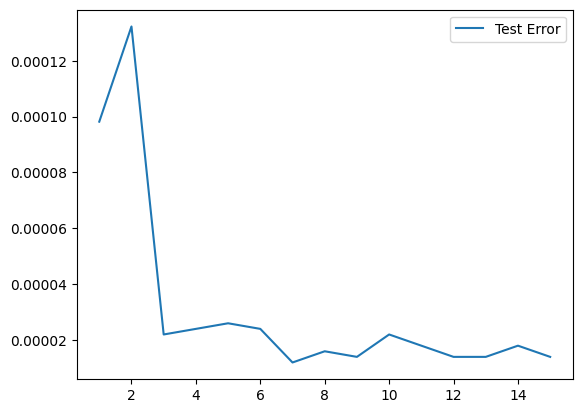

In [ ]:
plt.plot(range(1,16),test_error,label='Test Error')
plt.legend()

In [32]:
model_r = RandomForestClassifier(n_estimators=11,max_features='auto',random_state=101)
model_r.fit(X_train, y_train)
preds = model_r.predict(X_test)

In [34]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249361
           1       1.00      1.00      1.00    249697

    accuracy                           1.00    499058
   macro avg       1.00      1.00      1.00    499058
weighted avg       1.00      1.00      1.00    499058



In [35]:
score = model_r.score(X_test,y_test)

In [36]:
score

0.9999599244977537